In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.warn('Do not show this message')

In [2]:
gst = pd.read_excel('cleaned_GST.xlsx')

In [3]:
gst.head()

,Unnamed: 0,Date,Councellor Name,Course Name,Fees Received,Fees Total
0,0,2020-04-01,Pooja,GST,7500,7500
1,1,2020-04-01,Deepak,GST,8550,8550
2,2,2020-04-01,Pooja,GST,6750,6750
3,3,2020-04-01,Deepak,GST,8550,8550
4,4,2020-04-01,Deepak,GST,5000,5000


In [4]:
gst.isnull().sum()

Unnamed: 0         0
Date               0
Councellor Name    0
Course Name        0
Fees Received      0
Fees Total         0
dtype: int64

In [5]:
gst.drop(gst.columns[0], axis = 1, inplace=True)

In [6]:
gst.head()

,Date,Councellor Name,Course Name,Fees Received,Fees Total
0,2020-04-01,Pooja,GST,7500,7500
1,2020-04-01,Deepak,GST,8550,8550
2,2020-04-01,Pooja,GST,6750,6750
3,2020-04-01,Deepak,GST,8550,8550
4,2020-04-01,Deepak,GST,5000,5000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Fees Received'>

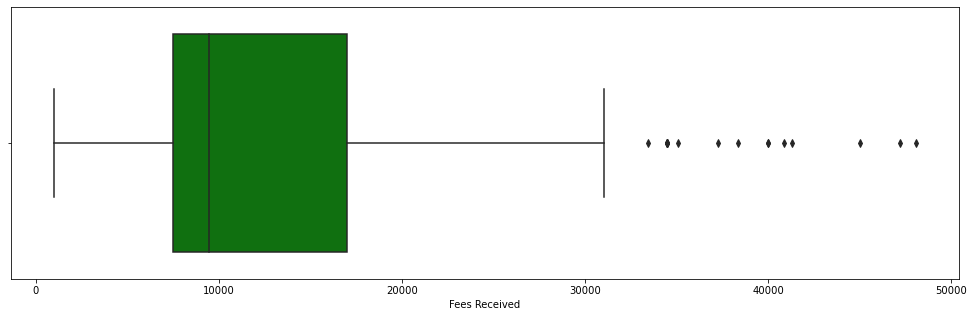

In [8]:
plt.rcParams['figure.figsize']=(17,5)
#checking for outliers using boxplot
sns.boxplot(gst['Fees Received'], color='green')

<AxesSubplot:xlabel='Fees Total'>

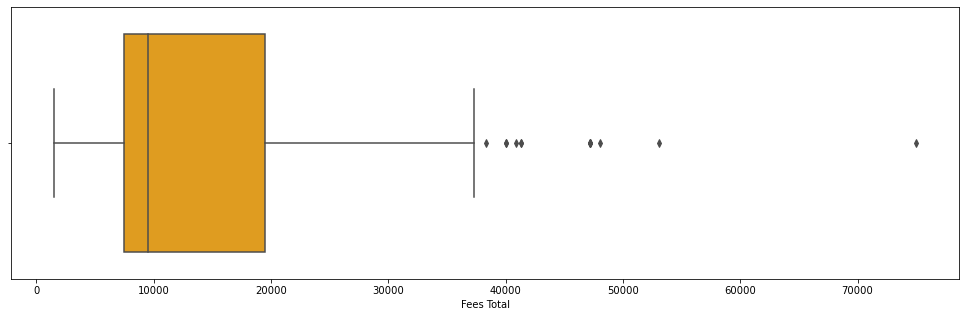

In [9]:
plt.rcParams['figure.figsize']=(17,5)
#checking for outliers using boxplot
sns.boxplot(gst['Fees Total'], color='orange')

In [10]:
gst.describe(include = 'all')

,Date,Councellor Name,Course Name,Fees Received,Fees Total
count,1114,1114,1114,1114.000000,1114.000000
unique,16,26,78,NaN,NaN
top,2021-07-01 00:00:00,Pooja,GST,NaN,NaN
freq,182,320,587,NaN,NaN
first,2020-04-01 00:00:00,NaN,NaN,NaN,NaN
last,2021-07-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12490.139138,13185.797127
std,NaN,NaN,NaN,7987.134541,8562.313226
min,NaN,NaN,NaN,1000.000000,1500.000000
25%,NaN,NaN,NaN,7500.000000,7500.000000


In [11]:
gst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1114 non-null   datetime64[ns]
 1   Councellor Name  1114 non-null   object        
 2   Course Name      1114 non-null   object        
 3   Fees Received    1114 non-null   int64         
 4   Fees Total       1114 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 43.6+ KB


## Removing outliers

In [12]:
gst.shape

(1114, 5)

In [13]:
from scipy import stats

# outlier using interquartile range
Q1 = gst.quantile(0.25)
Q3 = gst.quantile(0.75)
IQR = Q3 - Q1


In [14]:
dropIndex1 = gst[ ((gst['Fees Received'] < (Q1['Fees Received'] - 1.5 * IQR['Fees Received'])) |
                    (gst['Fees Received'] > (Q3['Fees Received'] + 1.5 * IQR['Fees Received'])))].index

In [15]:
gst.drop(dropIndex1 , inplace=True)

In [16]:
dropIndex2 = gst[ ((gst['Fees Total'] < (Q1['Fees Total'] - 1.5 * IQR['Fees Total'])) |
                    (gst['Fees Total'] > (Q3['Fees Total'] + 1.5 * IQR['Fees Total'])))].index

In [17]:
gst.drop(dropIndex2 , inplace=True)

In [18]:
gst.shape

(1092, 5)

<AxesSubplot:xlabel='Fees Received'>

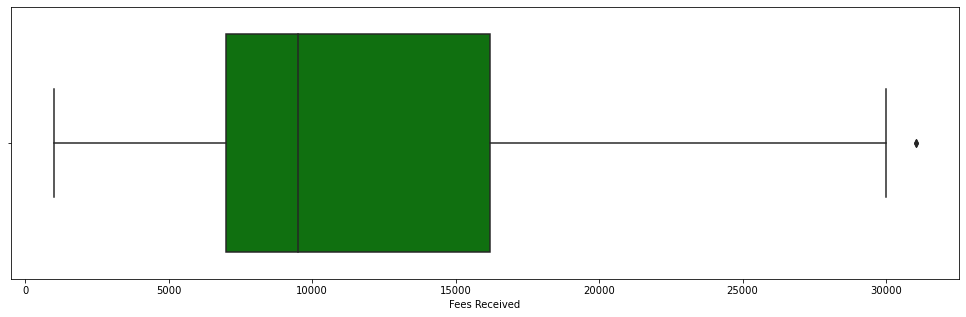

In [19]:
plt.rcParams['figure.figsize']=(17,5)
#checking for outliers using boxplot
sns.boxplot(gst['Fees Received'], color='green')

<AxesSubplot:xlabel='Fees Total'>

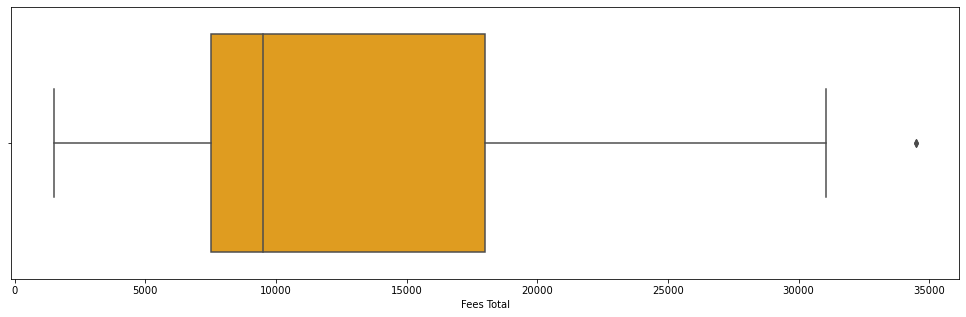

In [20]:
plt.rcParams['figure.figsize']=(17,5)
#checking for outliers using boxplot
sns.boxplot(gst['Fees Total'], color='orange')

In [21]:
gst.Date.unique()

array(['2020-04-01T00:00:00.000000000', '2020-05-01T00:00:00.000000000',
       '2020-06-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-08-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-11-01T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-02-01T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-05-01T00:00:00.000000000',
       '2021-06-01T00:00:00.000000000', '2021-07-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [22]:
gst['Date'] = pd.to_datetime(gst['Date'])

In [23]:
gst.head()

,Date,Councellor Name,Course Name,Fees Received,Fees Total
0,2020-04-01,Pooja,GST,7500,7500
1,2020-04-01,Deepak,GST,8550,8550
2,2020-04-01,Pooja,GST,6750,6750
3,2020-04-01,Deepak,GST,8550,8550
4,2020-04-01,Deepak,GST,5000,5000


## Monthly Sales Forcasting

In [24]:
monthly_revenue = gst.groupby(['Date']).sum()[['Fees Received']]
monthly_revenue.index.freq = 'MS'
display(monthly_revenue)

,Fees Received
Date,
2020-04-01,206200
2020-05-01,313600
2020-06-01,332450
2020-07-01,252200
2020-08-01,481950
2020-09-01,323500
2020-10-01,331275
2020-11-01,443750
2020-12-01,461650


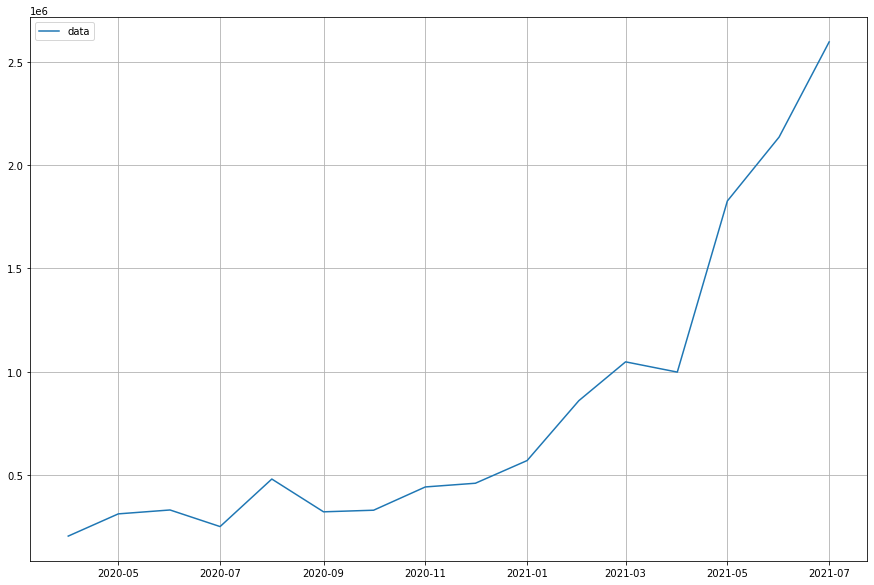

In [25]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(monthly_revenue,label='data')
plt.legend(loc=2)

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing

In [27]:
model = ExponentialSmoothing(monthly_revenue, seasonal_periods=12, trend='multiplicative', seasonal='additive')

In [28]:
fit1  = model.fit(smoothing_level=0.94, smoothing_slope=0.01)

E:\HenryHarvin\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [29]:
past1 = fit1.fittedvalues
past1

Date
2020-04-01    2.803744e+05
2020-05-01    3.920703e+05
2020-06-01    4.104716e+05
2020-07-01    3.294580e+05
2020-08-01    5.584306e+05
2020-09-01    3.992095e+05
2020-10-01    4.062212e+05
2020-11-01    5.179407e+05
2020-12-01    5.350928e+05
2021-01-01    6.440495e+05
2021-02-01    9.327448e+05
2021-03-01    1.119644e+06
2021-04-01    2.763556e+05
2021-05-01    1.225676e+06
2021-06-01    2.067737e+06
2021-07-01    2.350269e+06
Freq: MS, dtype: float64

In [30]:
fcast1 = fit1.forecast(10)
fcast1

2021-08-01    3.178611e+06
2021-09-01    3.435270e+06
2021-10-01    3.910376e+06
2021-11-01    4.548974e+06
2021-12-01    5.159186e+06
2022-01-01    5.935710e+06
2022-02-01    6.975855e+06
2022-03-01    8.008641e+06
2022-04-01    8.121521e+06
2022-05-01    9.299472e+06
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Monthly - Sales Forcast')

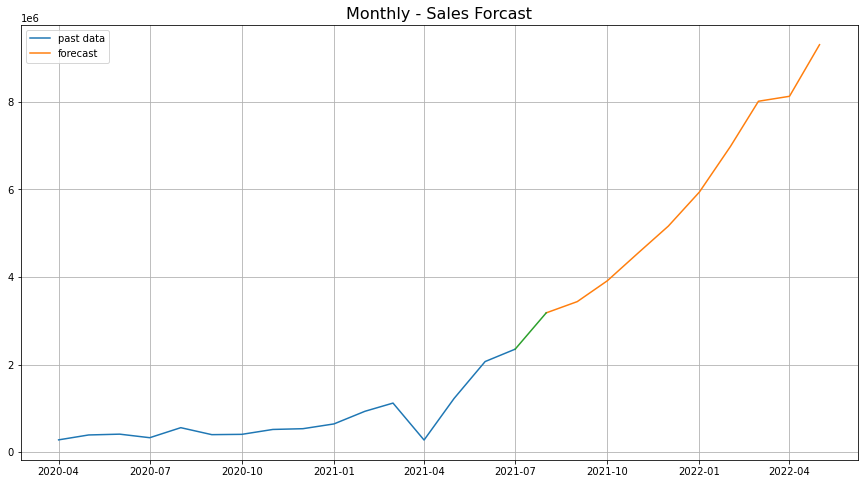

In [31]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(past1,label='past data')
plt.plot(fcast1,label='forecast')
x_values = [past1.index[-1], fcast1.index[0]]
y_values = [past1[-1], fcast1[0]]
plt.plot(x_values, y_values)
plt.legend(loc=2)
plt.title('Monthly - Sales Forcast', fontsize=16)

## Quaterly Sales Forcasting

In [32]:
quaterly_revenue = monthly_revenue.resample('QS').sum()[['Fees Received']]
quaterly_revenue

,Fees Received
Date,
2020-04-01,852250
2020-07-01,1057650
2020-10-01,1236675
2021-01-01,2480522
2021-04-01,4959567
2021-07-01,2594812


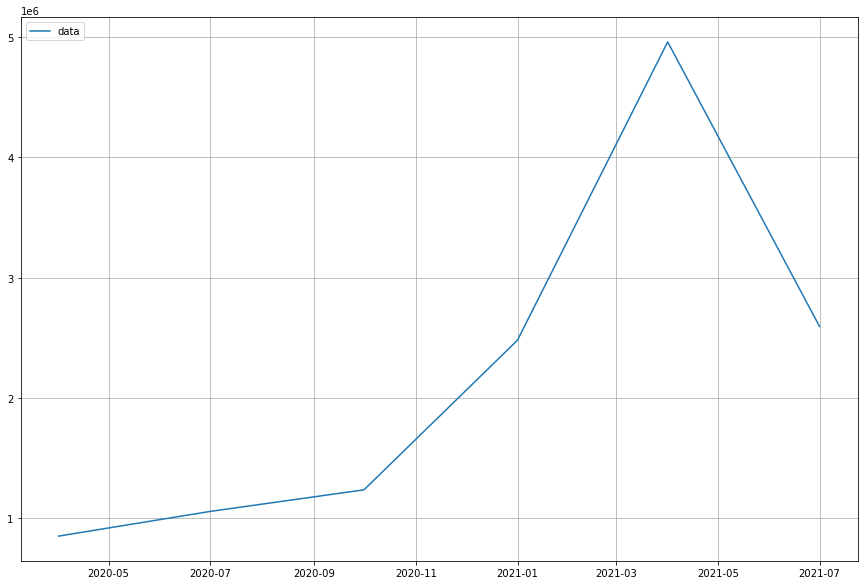

In [33]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(quaterly_revenue,label='data')
plt.legend(loc=2)

In [34]:
model2 = ExponentialSmoothing(quaterly_revenue, seasonal_periods=4, trend='multiplicative', seasonal='additive', freq='QS')

In [35]:
fit2  = model2.fit(smoothing_level=0.94, smoothing_slope=0.01)

E:\HenryHarvin\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [36]:
past2 = fit2.fittedvalues
past2

Date
2020-04-01    1.666128e+06
2020-07-01    1.926259e+06
2020-10-01    2.101305e+06
2021-01-01    3.336720e+06
2021-04-01    1.695689e+06
2021-07-01    6.876052e+06
Freq: QS-JAN, dtype: float64

In [37]:
fcast2 = fit2.forecast(4)
fcast2

2021-10-01    4.318235e+06
2022-01-01    7.202001e+06
2022-04-01    7.678951e+06
2022-07-01    1.052810e+07
Freq: QS-JAN, dtype: float64

Text(0.5, 1.0, 'Quaterly Sales Forcast')

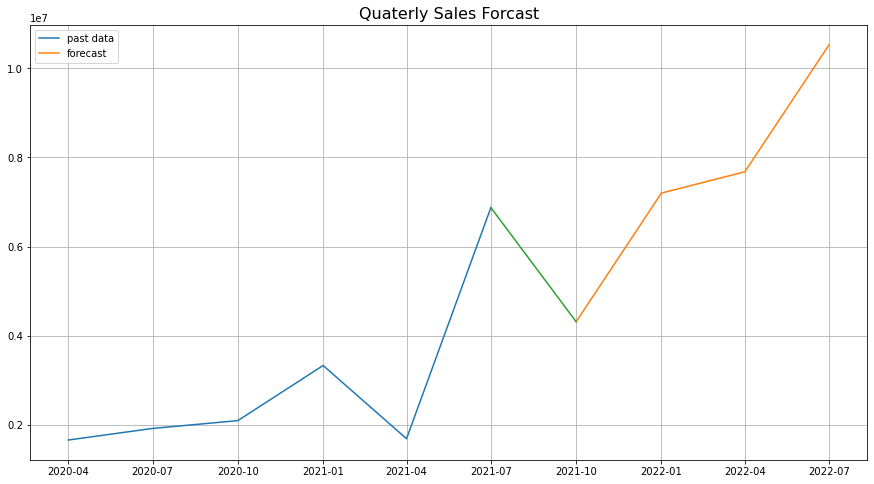

In [38]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(past2,label='past data')
plt.plot(fcast2,label='forecast')
x_values = [past2.index[-1], fcast2.index[0]]
y_values = [past2[-1], fcast2[0]]
plt.plot(x_values, y_values)
plt.legend(loc=2)
plt.title('Quaterly Sales Forcast', fontsize=16)

## GST Course Sales Forcasting

In [39]:
data3=gst[gst['Course Name'] == 'GST']
data3

,Date,Councellor Name,Course Name,Fees Received,Fees Total
0,2020-04-01,Pooja,GST,7500,7500
1,2020-04-01,Deepak,GST,8550,8550
2,2020-04-01,Pooja,GST,6750,6750
3,2020-04-01,Deepak,GST,8550,8550
4,2020-04-01,Deepak,GST,5000,5000
...,...,...,...,...,...
1085,2021-07-01,Diwakar,GST,3000,3000
1105,2021-07-01,Mushir,GST,11250,11250
1106,2021-07-01,Mushir,GST,13500,13500
1107,2021-07-01,Mushir,GST,12500,12500


In [40]:
gst_monthly_revenue = data3.groupby(['Date']).sum()[['Fees Received']]
gst_monthly_revenue.index.freq = 'MS'
display(gst_monthly_revenue)

,Fees Received
Date,
2020-04-01,206200
2020-05-01,313600
2020-06-01,191800
2020-07-01,252200
2020-08-01,481950
2020-09-01,323500
2020-10-01,331275
2020-11-01,313300
2020-12-01,347750


In [41]:
model3 = ExponentialSmoothing(gst_monthly_revenue, seasonal_periods=12, trend='multiplicative', seasonal='additive')
fit3  = model3.fit(smoothing_level=0.2, smoothing_slope=0.01)

E:\HenryHarvin\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [42]:
past3 = fit3.fittedvalues
past3

Date
2020-04-01    204473.437426
2020-05-01    310505.832313
2020-06-01    187625.980303
2020-07-01    247176.766812
2020-08-01    476262.383046
2020-09-01    317296.090181
2020-10-01    324673.424549
2020-11-01    306395.757351
2020-12-01    340619.139181
2021-01-01    234050.373196
2021-02-01    274011.271825
2021-03-01    507358.060698
2021-04-01    200033.517931
2021-05-01    319193.698552
2021-06-01    199889.240244
2021-07-01    255737.603845
Freq: MS, dtype: float64

In [43]:
fcast3 = fit3.forecast(10)
fcast3

2021-08-01    509882.820274
2021-09-01    350504.833951
2021-10-01    357264.511213
2021-11-01    338205.600635
2021-12-01    371518.130865
2022-01-01    263936.147448
2022-02-01    302803.303751
2022-03-01    534993.334828
2022-04-01    268818.573938
2022-05-01    340020.433707
Freq: MS, dtype: float64

Text(0.5, 1.0, 'GST Course - Sales Forcast')

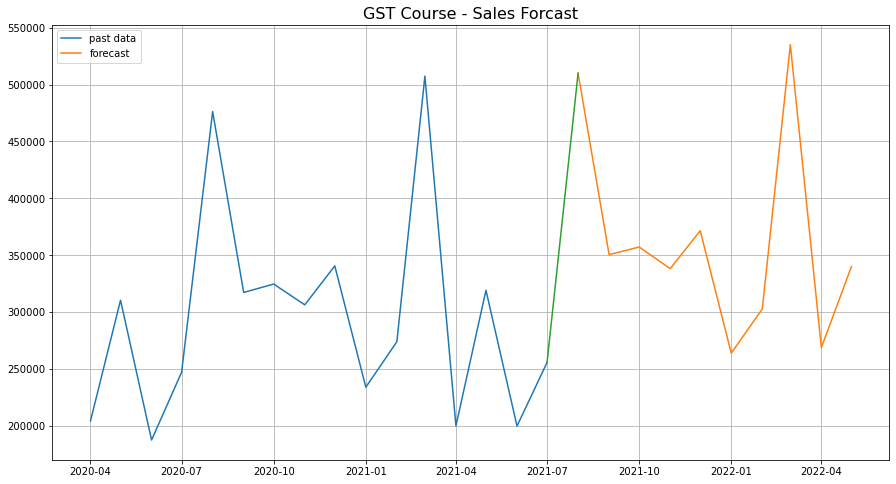

In [44]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(past3,label='past data')
plt.plot(fcast3,label='forecast')
x_values = [past3.index[-1], fcast3.index[0]]
y_values = [past3[-1], fcast3[0]]
plt.plot(x_values, y_values)
plt.legend(loc=2)
plt.title('GST Course - Sales Forcast', fontsize=16)

## Individual Councellor Sales Forcasting

In [45]:
data4 = gst[gst['Councellor Name'] == 'Pooja']
data4

,Date,Councellor Name,Course Name,Fees Received,Fees Total
0,2020-04-01,Pooja,GST,7500,7500
2,2020-04-01,Pooja,GST,6750,6750
7,2020-04-01,Pooja,GST,5000,5000
8,2020-04-01,Pooja,GST,9000,9000
9,2020-04-01,Pooja,GST,7500,7500
...,...,...,...,...,...
884,2021-06-01,Pooja,SAP FICO,26550,26550
897,2021-06-01,Pooja,SAP HR,18000,18000
910,2021-06-01,Pooja,SAP FICO,23650,23650
913,2021-06-01,Pooja,SAP HR,17550,17550


In [46]:
pooja_monthly_revenue = data4.groupby(['Date']).sum()[['Fees Received']]
pooja_monthly_revenue.index.freq = 'MS'
display(pooja_monthly_revenue)

,Fees Received
Date,
2020-04-01,129450
2020-05-01,191050
2020-06-01,184350
2020-07-01,155050
2020-08-01,331450
2020-09-01,229300
2020-10-01,227225
2020-11-01,188750
2020-12-01,196150


In [47]:
model4 = ExponentialSmoothing(pooja_monthly_revenue, seasonal_periods=12, trend='multiplicative', seasonal='additive')
fit4 = model4.fit(smoothing_level=0.9, smoothing_slope=0.01)

E:\HenryHarvin\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [48]:
past4 = fit4.fittedvalues
past4

Date
2020-04-01    137705.824978
2020-05-01    200088.292818
2020-06-01    193388.121593
2020-07-01    164006.760743
2020-08-01    340317.715560
2020-09-01    238078.678449
2020-10-01    235915.446743
2020-11-01    197353.095731
2020-12-01    204666.625190
2021-01-01    133628.027079
2021-02-01    359696.292623
2021-03-01    288562.413051
2021-04-01    137588.100547
2021-05-01    363918.808298
2021-06-01    408321.412369
Freq: MS, dtype: float64

In [49]:
fcast4 = fit4.forecast(10)
fcast4

2021-07-01    303875.820665
2021-08-01    494707.790398
2021-09-01    407559.662498
2021-10-01    421078.938484
2021-11-01    398814.012230
2021-12-01    423064.201827
2022-01-01    369626.785732
2022-02-01    613987.040653
2022-03-01    561863.280962
2022-04-01    431517.086953
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Councellor Pooja - Sales Forcast')

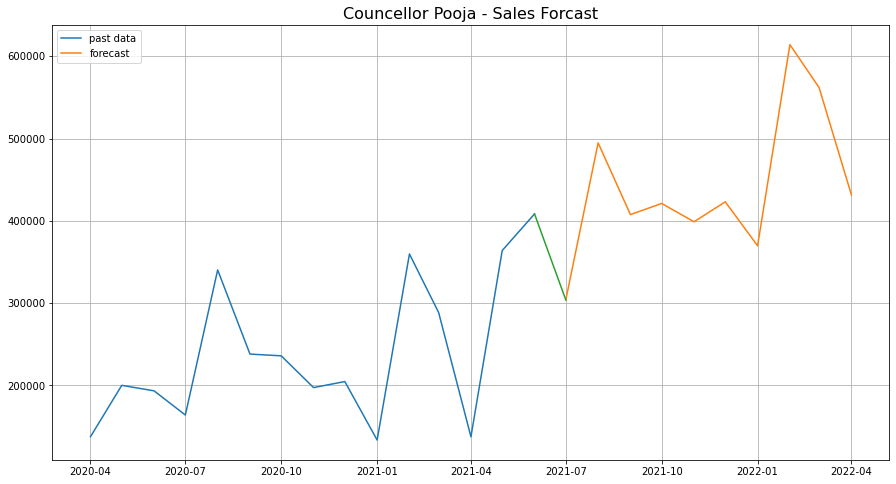

In [50]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(past4,label='past data')
plt.plot(fcast4,label='forecast')
x_values = [past4.index[-1], fcast4.index[0]]
y_values = [past4[-1], fcast4[0]]
plt.plot(x_values, y_values)
plt.legend(loc=2)
plt.title('Councellor Pooja - Sales Forcast', fontsize=16)